In [1]:
# importing libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
data = pd.read_csv('04.reduced_telco_data.csv')
data.head()

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-Month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Unknown,StreamingMovies_Yes
0,0,-0.244200,1,1,0.021083,0.001391,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,-0.306748,1,0,0.053733,0.002613,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,-0.744587,1,0,0.004393,0.000401,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1.069316,1,1,0.020597,0.002886,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,0,-0.619490,1,0,0.041444,0.001535,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0


In [3]:
y = data.iloc[:,6]
y

0        0
1        0
2        0
3        0
4        0
        ..
55995    1
55996    1
55997    1
55998    1
55999    1
Name: Churn, Length: 56000, dtype: int64

In [4]:
tmp = data.drop(data.columns[6], axis=1)
X = tmp.iloc[:,:]
X

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-Month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Unknown,TechSupport_Yes,StreamingTV_No,StreamingTV_Unknown,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Unknown,StreamingMovies_Yes
0,0,-0.244200,1,1,0.021083,0.001391,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,1,-0.306748,1,0,0.053733,0.002613,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0,-0.744587,1,0,0.004393,0.000401,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1.069316,1,1,0.020597,0.002886,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4,0,-0.619490,1,0,0.041444,0.001535,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0,-1.119877,0,1,0.014766,0.000296,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
55996,1,-0.181651,1,0,0.007828,0.000880,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
55997,0,0.694026,1,0,0.002511,0.001098,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
55998,0,-0.306748,1,0,0.006573,0.000742,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [5]:
np.random.seed(42)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state= 42,
    stratify=y,
)

In [7]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=5,random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
model.score(X_test, y_test)

0.7748214285714285

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7748214285714285

In [10]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.7936338619269194

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.66      0.76      5952
           1       0.70      0.90      0.79      5248

    accuracy                           0.77     11200
   macro avg       0.79      0.78      0.77     11200
weighted avg       0.80      0.77      0.77     11200



In [12]:
X.columns[0:]

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-Month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaymentMethod_Unknown', 'gender_Female', 'gender_Unknown',
       'Partner_No', 'Partner_Unknown', 'Partner_Yes', 'Dependents_No',
       'Dependents_Unknown', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_Unknown', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Unknown', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Unknown', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Unknown',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Unknown',
       'TechSupport_Yes', 

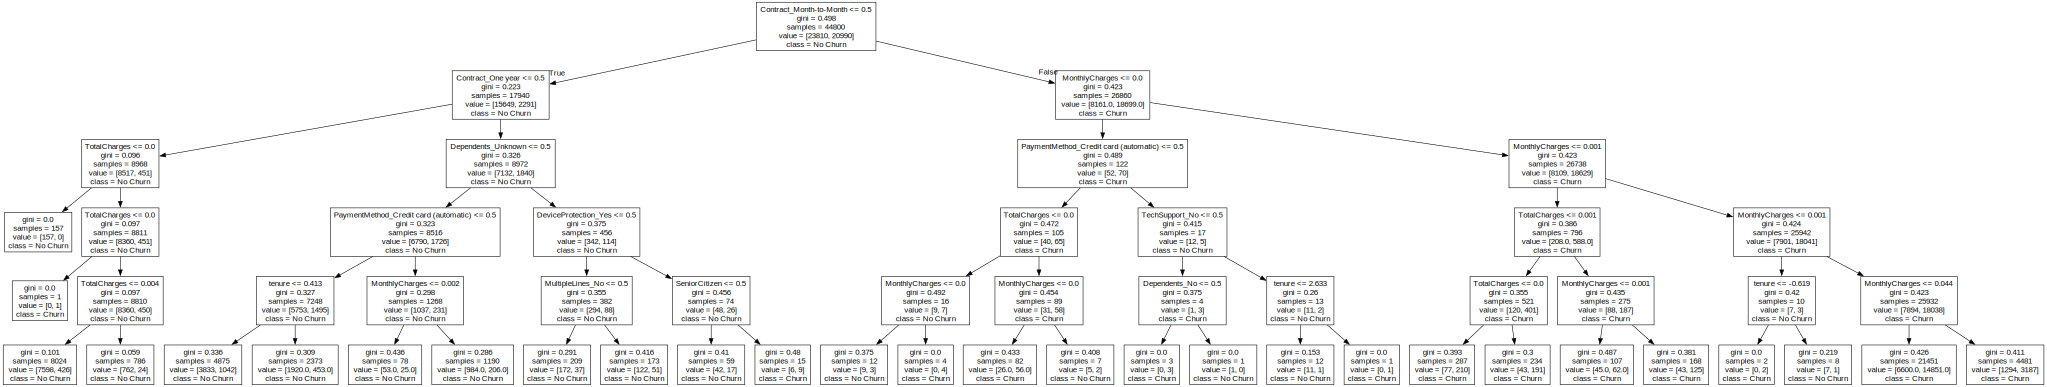

In [13]:
data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names=X.columns[0:], class_names=["No Churn","Churn"])
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)